In [1]:
!pip install gputil
!pip install torch
!pip install "ray[rllib]" tensorflow torch
!pip install gym[atari,accept-rom-license]


In [2]:
from IPython.display import clear_output
import torch
def plot_durations(durations, rewards, show_result=False):
    clear_output(True)
    fig, axis = plt.subplots(2)
    fig.set_figwidth(7)
    fig.set_figheight(7)
    rewards_t = torch.tensor(rewards, dtype=torch.float)
    durations_t = torch.tensor(durations, dtype=torch.float)
    if show_result:
        fig.suptitle('Result')
    else:
        axis[0].cla()
        axis[1].cla()
        fig.suptitle('Training...')

    axis[0].set_xlabel('Episode')
    axis[0].set_ylabel('Reward')
    axis[0].plot(rewards_t.numpy())
    
    
    

    # Take 100 episode averages and plot them too
    if len(rewards_t) >= 100:
        means = rewards_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        axis[0].plot(means.numpy())

    axis[1].set_xlabel('Episode')
    axis[1].set_ylabel('Duration')
    axis[1].plot(durations_t.numpy() )

    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = rewards_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        axis[1].plot(means.numpy())

    plt.tight_layout()
    plt.pause(0.001)

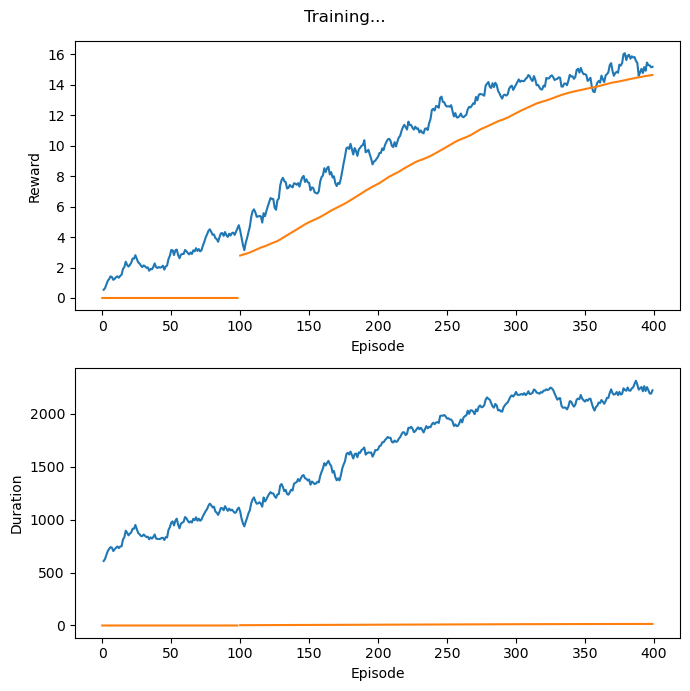

In [3]:

import ray.rllib.algorithms.ppo as ppo
import ray
import matplotlib.pyplot as plt


config = {
        "framework": "torch",
        # Make analogous to old v4 + NoFrameskip.
        "env": "ALE/Breakout-v5",
        "env_config":{
            "frameskip": 1,
            "full_action_space": False,
            "repeat_action_probability": 0.0
        },
            
        "lambda": 0.95,
        "kl_coeff": 0.5,
        "clip_rewards": True,
        "clip_param": 0.1,
        "vf_clip_param": 10.0,
        "entropy_coeff": 0.01,
        "train_batch_size": 5000,
        "rollout_fragment_length": 100,
        "sgd_minibatch_size": 500,
        "num_sgd_iter": 10,
        "num_workers": 10,
        "num_envs_per_env_runner": 5,
        "batch_mode": "truncate_episodes",
        "observation_filter": "NoFilter",
        "model":{
            "vf_share_layers": True
        },
            
        "num_gpus": 1
}
algo=ppo.PPO(config=config)
episode_len=[]
episode_reward=[]
episode_count=[]
for i in range(400):
    result=algo.train()
    episode_len.append(result['episode_len_mean'])
    episode_reward.append(result['episode_reward_mean'])
    episode_count.append(i)
    plot_durations(episode_len,episode_reward)
    
    
    